<a href="https://colab.research.google.com/github/Lee-Gunju/Lee-Gunju/blob/master/Leegunju_assign08_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Plot the average image [5pt]



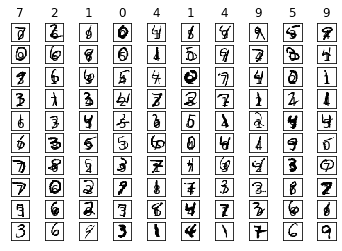

In [1]:
import matplotlib.pyplot as plt
import numpy as np

file_data   = "mnist_test.csv"
handle_file = open(file_data, "r")
data        = handle_file.readlines()
handle_file.close()

size_row    = 28    # height of the image
size_col    = 28    # width of the image

num_image   = len(data)
count       = 0     # count for the number of images

#
# make a matrix each column of which represents an images in a vector form 
#
list_image  = np.empty((size_row * size_col, num_image), dtype=float)
list_label  = np.empty(num_image, dtype=int)

for line in data:

    line_data   = line.split(',')
    label       = line_data[0]
    im_vector   = np.asfarray(line_data[1:])

    list_label[count]       = label
    list_image[:, count]    = im_vector    

    count += 1

# 
# plot first 100 images out of 10,000 with their labels
# 
f1 = plt.figure(1)



for i in range(100):

    label       = list_label[i]
    im_vector   = list_image[:, i]
    im_matrix   = im_vector.reshape((size_row, size_col))

    plt.subplot(10, 10, i+1)
    plt.title(label)
    plt.imshow(im_matrix, cmap='Greys', interpolation='None')

    frame   = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)

plt.show()


# 1. Plot the average image [5pt]



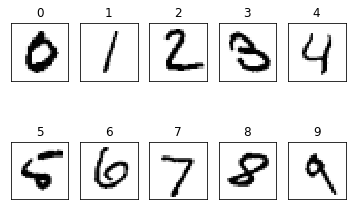

In [2]:
for i in range(10):
  cnt = -1
  for j in list_label:
    cnt += 1
    if j == i:
      im_vector   = list_image[:, cnt]
      im_matrix   = im_vector.reshape((size_row, size_col))
      plt.subplot(2, 5, i+1)
      plt.title(j)
      plt.imshow(im_matrix, cmap = 'Greys', interpolation = 'None')
      frame   = plt.gca()
      frame.axes.get_xaxis().set_visible(False)  
      frame.axes.get_yaxis().set_visible(False)
      break
plt.show()

# 2. Present the output of the neural network with random weights [9pt]



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


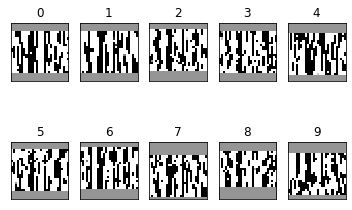

In [3]:

def sigmoid(z):
  return 1 / (1 + np.exp(-z))


W = np.random.randn(28, 28)

for i in range(len(list_label)):
  temp = np.reshape(list_image[:, i], (W.shape[0], W.shape[1]))
  temp = np.dot(temp, W)
  temp = np.reshape(temp, (784))
  list_image[:, i] = sigmoid(temp)

for i in range(10):
  cnt = -1
  for j in list_label:
    cnt += 1
    if j == i:
      im_vector   = list_image[:, cnt]
      im_matrix   = im_vector.reshape((size_row, size_col))
      plt.subplot(2, 5, i+1)
      plt.title(j)
      plt.imshow(im_matrix, cmap = 'Greys', interpolation = 'None')
      frame   = plt.gca()
      frame.axes.get_xaxis().set_visible(False)   
      frame.axes.get_yaxis().set_visible(False)
      break
plt.show()